In [9]:
import warnings
warnings.filterwarnings("ignore")
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.stattools import acf, pacf
from pmdarima.arima import auto_arima
from scipy import stats
from sklearn.model_selection import train_test_split
import bsts
from sklearn.metrics import mean_squared_error

In [10]:
data = []

df = pd.read_excel('C:/Users/katya/OneDrive/Рабочий стол/_/НГТУ/8 семестр/КМ/новые_данные.xlsx',index_col=None, header=None)
for i in range (0,len(df)):
    data.append(round(df.values[i][0],2))

In [11]:
# Разделяем выборку на обучающую и тестовую для построения модели
data_ = pd.Series(data) # Временной ряд

n_train = 70
n_test = 10

data_train = data_[len(data_)-n_train-n_test:-n_test]
data_test = data_[-n_test:]

In [12]:
# Цикличная проверка для различных параметров
import math

n_train_list = [30,45,60,70]
ws_list = [[20,20],[25,25],[30,30],[90,90]]

for n_train in n_train_list:
    data_train = data_[len(data_)-n_train-n_test:-n_test]
    print('/////////////')
    print('n_train', n_train)
    for ws in ws_list:
        w = ws[0]
        s = ws[1]
        model = bsts.BSTS(seasonality=45)
        model.fit(data_train.values, num_warmup=w, num_samples=s)

        # Предсказание
        forecast = model.predict(n_test)
        preds = forecast.mean(axis=0)

        # Расчет MSE
        mse = mean_squared_error(data_test.values, preds)
        
        print('num_warmup = ', w)
        print('num_samples = ', s)
        print('mse = ', round(mse,2))
    

/////////////
n_train 30


sample: 100%|████████████████████████████| 40/40 [00:00<00:00, 181.39it/s, 1023 steps of size 1.63e-02. acc. prob=0.02]


num_warmup =  20
num_samples =  20
mse =  2.07


sample: 100%|████████████████████████████| 50/50 [00:00<00:00, 167.55it/s, 1023 steps of size 4.19e-03. acc. prob=0.20]


num_warmup =  25
num_samples =  25
mse =  4.74


sample: 100%|████████████████████████████| 60/60 [00:00<00:00, 112.06it/s, 1023 steps of size 4.87e-03. acc. prob=0.06]


num_warmup =  30
num_samples =  30
mse =  3.79


sample: 100%|██████████████████████████| 180/180 [00:01<00:00, 105.42it/s, 1023 steps of size 8.34e-04. acc. prob=0.90]


num_warmup =  90
num_samples =  90
mse =  4.4
/////////////
n_train 45


sample: 100%|████████████████████████████| 40/40 [00:00<00:00, 104.66it/s, 1023 steps of size 7.88e-03. acc. prob=0.13]


num_warmup =  20
num_samples =  20
mse =  1.2


sample: 100%|████████████████████████████| 50/50 [00:00<00:00, 104.04it/s, 1023 steps of size 2.64e-03. acc. prob=0.30]


num_warmup =  25
num_samples =  25
mse =  2.91


sample: 100%|█████████████████████████████| 60/60 [00:00<00:00, 93.50it/s, 1023 steps of size 1.51e-03. acc. prob=0.50]


num_warmup =  30
num_samples =  30
mse =  1.55


sample: 100%|███████████████████████████| 180/180 [00:02<00:00, 81.20it/s, 1023 steps of size 1.15e-03. acc. prob=0.84]


num_warmup =  90
num_samples =  90
mse =  0.81
/////////////
n_train 60


sample: 100%|█████████████████████████████| 40/40 [00:00<00:00, 91.84it/s, 1023 steps of size 7.57e-03. acc. prob=0.10]


num_warmup =  20
num_samples =  20
mse =  0.19


sample: 100%|█████████████████████████████| 50/50 [00:00<00:00, 74.05it/s, 1023 steps of size 5.11e-03. acc. prob=0.08]


num_warmup =  25
num_samples =  25
mse =  1.52


sample: 100%|█████████████████████████████| 60/60 [00:00<00:00, 77.63it/s, 1023 steps of size 1.61e-03. acc. prob=0.74]


num_warmup =  30
num_samples =  30
mse =  0.21


sample: 100%|███████████████████████████| 180/180 [00:03<00:00, 58.18it/s, 1023 steps of size 1.88e-03. acc. prob=0.86]


num_warmup =  90
num_samples =  90
mse =  0.18
/////////////
n_train 70


sample: 100%|█████████████████████████████| 40/40 [00:00<00:00, 79.54it/s, 1023 steps of size 1.52e-02. acc. prob=0.02]


num_warmup =  20
num_samples =  20
mse =  4.75


sample: 100%|█████████████████████████████| 50/50 [00:00<00:00, 75.17it/s, 1023 steps of size 4.84e-03. acc. prob=0.10]


num_warmup =  25
num_samples =  25
mse =  3.01


sample: 100%|█████████████████████████████| 60/60 [00:00<00:00, 65.75it/s, 1023 steps of size 2.18e-03. acc. prob=0.37]


num_warmup =  30
num_samples =  30
mse =  1.01


sample: 100%|███████████████████████████| 180/180 [00:03<00:00, 58.44it/s, 1023 steps of size 1.75e-03. acc. prob=0.87]


num_warmup =  90
num_samples =  90
mse =  0.23


sample: 100%|███████████████████████████| 180/180 [00:02<00:00, 65.03it/s, 1023 steps of size 1.75e-03. acc. prob=0.87]


mse =  0.2267


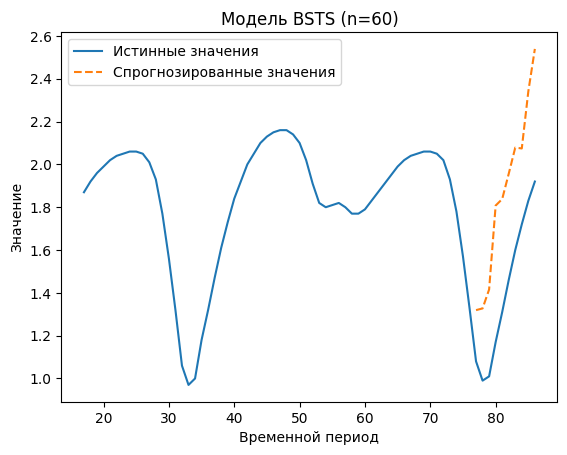

In [15]:
# Отображение одного результата на графике

# Обучаем
n_train = 60
model = bsts.BSTS(seasonality=45)
model.fit(data_train.values, num_warmup=90, num_samples=90)

# Предсказываем
forecast = model.predict(n_test)
preds = forecast.mean(axis=0)

mse = mean_squared_error(data_test.values, preds)
print('mse = ', round(mse,4))

# Строим график
data_all = data_[-(n_test+n_train):]

plt.plot(data_all, label='Истинные значения')
plt.plot(range(len(data_) - n_test, len(data_)), preds, "--", label='Спрогнозированные значения')
plt.xlabel('Временной период')
plt.ylabel('Значение')
plt.title('Модель BSTS (n={})'.format(n_train))
plt.legend()
plt.gcf().set_facecolor('white')
plt.show()